# **Section 1**: Twitter Dataset

The dataset that accompanies this paper has been compiled and included below as a Pandas dataframe (assigned to the variable `mccabe_data`). Please base your main analyses on this shared dataset. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
mccabe_data = pd.read_csv('/home/jovyan/compss-214a/mccabe-public-data.csv')

You are welcome to rename the dataset or work with different subsets of this data or with additional datasets if neccesary, but this shared dataset should be the primary source for your analyses, so that we are all working with the same underlying source of information.

---

# **Section 2** Exploring the structure of the dataset
Describe the key variables you are interested in. Feel free to include data summaries and/or vizualizations that illustrate how the dataset is structured, such as the different groups of users you are interested in and the different measures of whether posts are classified as misinformation, etc.

## **Section 2-1** Overall data structure

In [3]:
# Load the dataset, rename it as df and make a copy
df = mccabe_data.copy()
df.shape

(32968, 29)

In [4]:
df.head()

,date,fake_merged,fake_merged_initiation,fake_merged_rt,fake_grinberg_initiation,fake_grinberg_rt,fake_grinberg_rb_initiation,fake_grinberg_rb_rt,fake_newsguard_initiation,fake_newsguard_rt,...,not_fake_shopping,not_fake_shopping_initiation,not_fake_shopping_rt,not_fake_sports,not_fake_sports_initiation,not_fake_sports_rt,n,stat,nusers,group
0,2019-11-30,875.0,199.0,676.0,74.0,207.0,42.0,138.0,188.0,653.0,...,196.0,61.0,135.0,16.0,7.0,9.0,12387.0,total,4390,fns
1,2019-12-01,3382.0,825.0,2557.0,257.0,941.0,120.0,546.0,760.0,2293.0,...,608.0,207.0,401.0,99.0,33.0,66.0,54897.0,total,11629,fns
2,2019-12-02,3644.0,992.0,2652.0,280.0,780.0,141.0,479.0,926.0,2455.0,...,684.0,289.0,395.0,82.0,37.0,45.0,68505.0,total,13132,fns
3,2019-12-03,4184.0,1110.0,3074.0,339.0,921.0,185.0,562.0,1052.0,2890.0,...,782.0,236.0,546.0,92.0,41.0,51.0,74502.0,total,13997,fns
4,2019-12-04,4436.0,1100.0,3336.0,307.0,1171.0,135.0,540.0,1038.0,3146.0,...,540.0,261.0,279.0,124.0,53.0,71.0,71762.0,total,13967,fns


In [5]:
# See the complete list of column names
df.columns

Index(['date', 'fake_merged', 'fake_merged_initiation', 'fake_merged_rt',
       'fake_grinberg_initiation', 'fake_grinberg_rt',
       'fake_grinberg_rb_initiation', 'fake_grinberg_rb_rt',
       'fake_newsguard_initiation', 'fake_newsguard_rt', 'not_fake',
       'not_fake_initiation', 'not_fake_rt', 'not_fake_conservative',
       'not_fake_conservative_initiation', 'not_fake_conservative_rt',
       'not_fake_liberal', 'not_fake_liberal_initiation',
       'not_fake_liberal_rt', 'not_fake_shopping',
       'not_fake_shopping_initiation', 'not_fake_shopping_rt',
       'not_fake_sports', 'not_fake_sports_initiation', 'not_fake_sports_rt',
       'n', 'stat', 'nusers', 'group'],
      dtype='object')

In [6]:
# Some columns have been obmitted in presentation, let's see a complete one
df.iloc[0]

date                                2019-11-30
fake_merged                              875.0
fake_merged_initiation                   199.0
fake_merged_rt                           676.0
fake_grinberg_initiation                  74.0
fake_grinberg_rt                         207.0
fake_grinberg_rb_initiation               42.0
fake_grinberg_rb_rt                      138.0
fake_newsguard_initiation                188.0
fake_newsguard_rt                        653.0
not_fake                               11512.0
not_fake_initiation                     4357.0
not_fake_rt                             7155.0
not_fake_conservative                    529.0
not_fake_conservative_initiation         156.0
not_fake_conservative_rt                 373.0
not_fake_liberal                        1030.0
not_fake_liberal_initiation              247.0
not_fake_liberal_rt                      783.0
not_fake_shopping                        196.0
not_fake_shopping_initiation              61.0
not_fake_shop

In [7]:
# See what're contained in the non-numerical value
df["stat"].unique(), df["group"].unique()

(array(['total', 'avg'], dtype=object),
 array(['fns', 'suspended', 'ha', 'ma', 'la', 'qanon', 'av', 'ss1', 'ss5',
        'A', 'B', 'D', 'F', 'all', 'nfns', 'nfns_ha', 'nfns_ma', 'nfns_la',
        'A_ha', 'B_ha', 'D_ha', 'F_ha', 'A_ma', 'B_ma', 'D_ma', 'F_ma',
        'A_la', 'B_la', 'D_la', 'F_la'], dtype=object))

In [8]:
# Some simple observations(see the text below)

_Based on simple calculation and reference to the codebook, the fake_merged is simply the combination of fake_merged_initiation and fake_merged_rt. The same principle applies to not_fake, not_fake_conservative, not_fake_liberal, not_fake_shopping, and not_fake_sports. Besides, the nusers is a combination of fake_merged and not_fake. And it is worth noting that the stat has two distintive values including total and average, so we should deal with this carefully in the later analyses._

In [9]:
# To see what the avg and total means by observing a random selected date
df_selected = df[df['date'] == '2019-11-30']
# df_selected
# For the cleaniess of the pdf file, here I did not run the cell; but during the analysis, I did look at the whole picture

In [10]:
# The data structure becomes clear now (see the notes below)

_It seems like each data are supposed to have 60 rows (the 30 classifications in the "group" mutiplied by the two kinds of stat: total and avg). But as the total number could not be divided evenly by 60, I would write a function below to see if there's any inconsistency and figure out the reasons for those (potential) inconsistencies. But before that, let's check the ditribution of time first._

In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
# Data summary and descriptive statistics
df_total=df[df["stat"]=="total"]
summary_stats = df_total.describe(include='all').style.format(precision=2)
summary_stats

,date,fake_merged,fake_merged_initiation,fake_merged_rt,fake_grinberg_initiation,fake_grinberg_rt,fake_grinberg_rb_initiation,fake_grinberg_rb_rt,fake_newsguard_initiation,fake_newsguard_rt,not_fake,not_fake_initiation,not_fake_rt,not_fake_conservative,not_fake_conservative_initiation,not_fake_conservative_rt,not_fake_liberal,not_fake_liberal_initiation,not_fake_liberal_rt,not_fake_shopping,not_fake_shopping_initiation,not_fake_shopping_rt,not_fake_sports,not_fake_sports_initiation,not_fake_sports_rt,n,stat,nusers,group
count,16484,16484.00,16484.00,16484.00,16484.00,16484.00,16484.00,16484.00,16484.00,16484.00,16484.00,16484.00,16484.00,16484.00,16484.00,16484.00,16484.00,16484.00,16484.00,16484.00,16484.00,16484.00,16484.00,16484.00,16484.00,16484.00,16484,16484.00,16484
unique,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,nan,30
top,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,total,nan,fns
freq,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,16484,nan,550
mean,2020-08-29 19:27:21.446251008,1816.38,379.00,1437.38,116.53,484.67,67.94,302.52,360.77,1351.67,34438.99,14423.19,20015.80,1552.06,554.76,997.29,2109.63,507.11,1602.52,710.08,333.27,376.80,53.93,19.02,34.91,36255.37,nan,9600.57,nan
min,2019-11-30 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,nan,1.00,nan
25%,2020-04-15 00:00:00,116.00,33.00,77.00,7.00,18.00,2.00,6.00,31.00,71.00,4235.00,1246.00,2432.00,230.00,71.00,136.00,155.00,34.00,119.00,18.00,6.00,9.00,4.00,1.00,2.00,4686.25,nan,519.75,nan
50%,2020-08-29 00:00:00,636.00,146.50,458.00,50.00,134.00,32.00,68.00,142.00,429.00,13385.50,5334.00,8437.50,766.00,215.00,530.00,738.00,204.50,517.00,127.00,59.00,63.00,16.00,4.00,11.00,14769.50,nan,1882.50,nan
75%,2021-01-14 00:00:00,2800.50,598.00,2266.25,176.00,761.00,97.00,473.25,569.00,2123.00,44738.00,12778.75,28380.25,2312.25,726.25,1416.00,3089.00,671.00,2345.25,1107.00,288.00,640.25,56.00,20.00,36.00,48138.00,nan,6164.25,nan
max,2021-05-31 00:00:00,19143.00,3124.00,16145.00,1034.00,5142.00,706.00,4186.00,3033.00,15829.00,355049.00,131886.00,223163.00,15075.00,5649.00,11149.00,27622.00,5691.00,23579.00,6368.00,3544.00,3134.00,1026.00,372.00,718.00,363619.00,nan,97893.00,nan


The time range for the dataset becomes clear now, starting from 2019-11-30, and ending on 2021-05-31.

In [13]:
# Define the start date and end date
start_date='2019-11-30'
end_date= '2021-05-31'

In [14]:
# Here is a function to check the number of rows for each day within the timeframe
def check_row_count_per_date(df, start_date, end_date):
    # Create a date range from start_date to end_date
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    inconsistent_dates = {}
    for date in date_range:
        df_filtered = df[df['date'] == date.strftime('%Y-%m-%d')]
        if len(df_filtered) != 60:
            inconsistent_dates[date.strftime('%Y-%m-%d')] = len(df_filtered)
    return inconsistent_dates

In [15]:
inconsistent_dates = check_row_count_per_date(df, start_date, end_date)
inconsistent_dates

{'2020-06-30': 120,
 '2020-07-08': 58,
 '2020-07-10': 58,
 '2020-08-17': 58,
 '2020-10-24': 58,
 '2020-10-26': 58,
 '2020-10-29': 58,
 '2020-10-31': 58,
 '2020-11-01': 58,
 '2021-01-12': 58,
 '2021-01-13': 58,
 '2021-01-14': 58,
 '2021-01-15': 58,
 '2021-01-16': 58,
 '2021-01-17': 58,
 '2021-01-19': 58,
 '2021-01-21': 58}

In [16]:
# Simple description has attached below

_There were even 120 rows in the date "2020-06-30", exactly two times the value it is supposed to be. Therefore, it is very likely that there are duplicated values in this particular date. It looks like there're fewer than 60 rows in some dates, but they are consistently 58 rows. The "missing" values were not always the same. But one thing in common is that it is always missed for a same subgroup category. After some careful examination, I figured out that the missing values are always those with subgroup ineligible for certain grouping labels._

In [17]:
# I have tried as many dates as I can manually, but I would not display them here for the cleaniess of the final pdf file. 
# Example code
# df_filtered_1 = df[df['date'] == '2020-06-30']
# df_filtered_1

In [18]:
# Alternatively, we could write a function here to visulize the distribution of different groups.
def plot_group_distribution(df, group_column='group'):
    group_counts = df[group_column].value_counts()
    # Plotting
    plt.figure(figsize=(10, 6))
    group_counts.plot(kind='bar')
    plt.title(f'Distribution of {group_column}')
    plt.xlabel('Groups')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

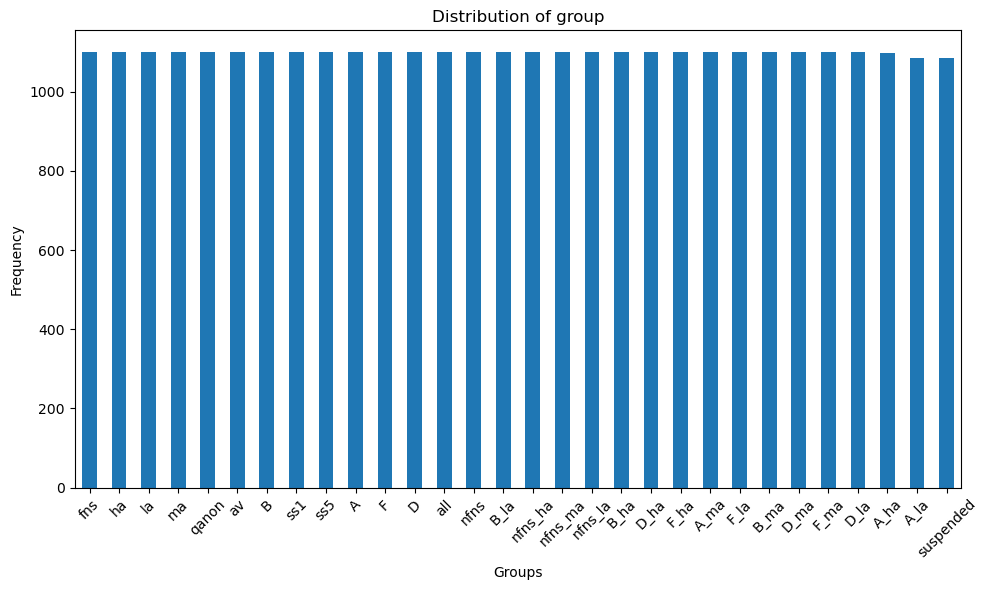

In [19]:
plot_group_distribution(df,group_column='group')

The graph indicates that each group has almost a same frequency, as the bars appear to be almost equal in height, suggesting a balanced dataset across groups. This implies that the number of data points or observations is relatively uniform among the groups, which is beneficial for comparative analysis. However, we could notice a slightly difference in the A_ha, A_la and suspended groups.

## **Section 2-2** Interesting Variables and More on Visualization

In [20]:
df['date'] = pd.to_datetime(df['date'])

In [21]:
# Write a function to visualize the number of users within a specific group

def plot_group_totals(df, group_name):
    group_totals = df[(df['group'] == group_name) & (df['stat'] == "total")].copy()
    suspension_start = pd.to_datetime('2021-01-06')
    suspension_end = pd.to_datetime('2021-01-12')

    # Remove duplicates and handle missing values in 'date' or 'nusers'
    group_totals = group_totals.drop_duplicates(subset=['date'])
    group_totals = group_totals.dropna(subset=['date', 'nusers'])
    group_totals = group_totals.sort_values(by='date')
    
    # Create a new figure and plot the data as a line plot
    plt.figure(figsize=(16, 2))  # Specify a wide but shallow figure size
    plt.plot(group_totals['date'], group_totals['nusers'], color="#00008B")
    plt.xlabel('Date')
    plt.ylabel('Number of Users')
    plt.axvline(suspension_start, color='r', linestyle='--', label='Suspension Starts (January 6th 2021)')
    plt.axvline(suspension_end, color='g', linestyle='--', label='Suspension Ends (January 12th 2021)')
    plt.legend()
    plt.title(f'{group_name.capitalize()} Group: Total Users Over Time')
    plt.show()

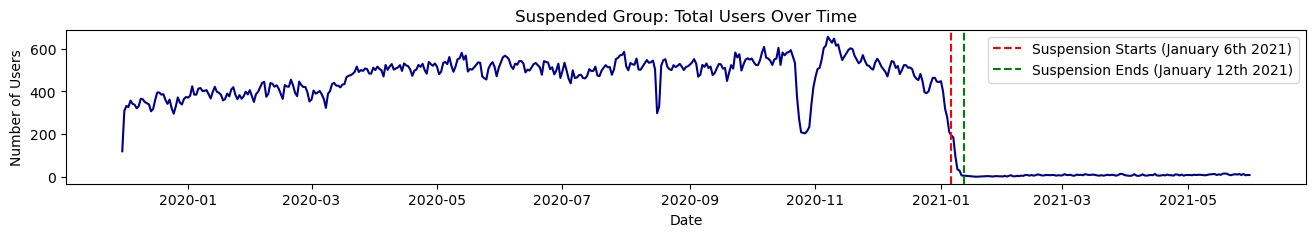

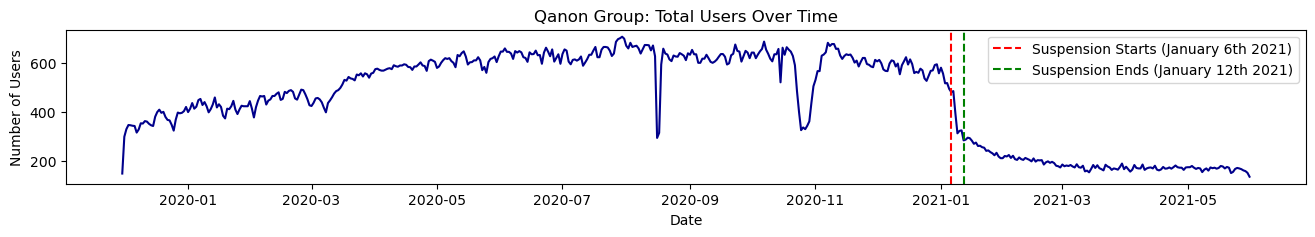

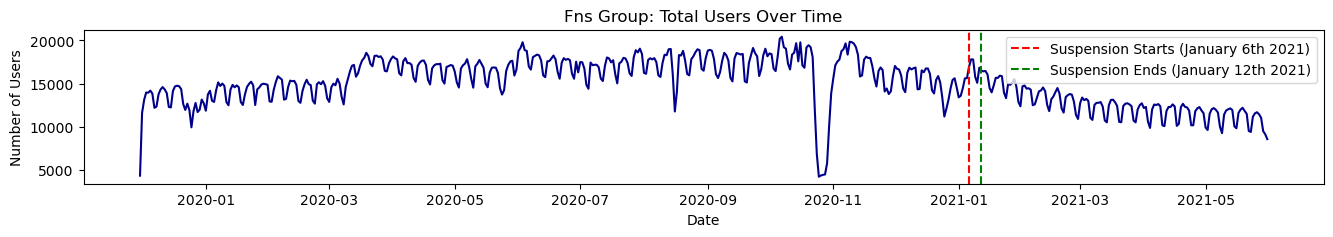

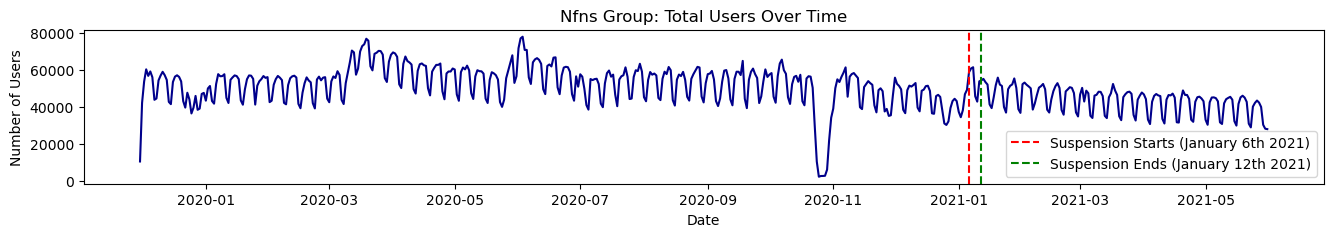

In [22]:
plot_group_totals(df, "suspended")
plot_group_totals(df, "qanon")
plot_group_totals(df, "fns")
plot_group_totals(df, "nfns")

The graph displays the total number of users over time for four different groups: Suspended, QAnon, Fns, and Nfns, from early 2020 to mid-2021. In particular, the number of Suspended group users has seen a sharp decline and maintained zero afterward. This shows the mechanism of deplatforming. The QAnon group also sees a similar trend. For the more general groups, Fns and Nfns, the numbers fluctuated during the period and demonstrated a slight decline afterward. This pattern suggests that the suspension significantly impacted user participation across all four groups, but with different levels of magnitude.

In [23]:
### Apart from the above, I am also very interested in the Anti-Vaccine(av) group, and would like to explore more of this subgroup

In [24]:
## subset to just the Anti-Vaccine group
av = df[(df['group'] == "av")].copy()
av_totals = av[
    (av["stat"] == "total")
].copy()

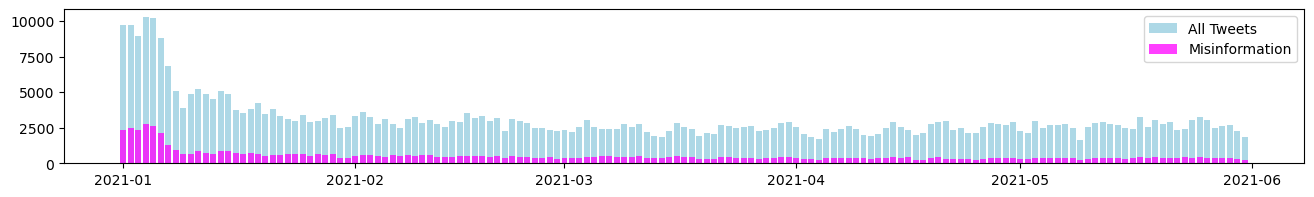

In [25]:
# Subset to just tweets during 2021
av_totals_2021 = av_totals[av_totals.date >= "2021-01-01"]

# Make a wide figure for the timeseries
plt.figure(figsize=(16, 2))

# Plot date on the x axis, and n (total number of tweets) on the y axis
plt.bar(av_totals_2021.date, av_totals_2021.n, color='lightblue', label="All Tweets")

# Overlay a count of the misinformation tweets (the fake_merged variable) in a different color
plt.bar(
    av_totals_2021.date,
    av_totals_2021.fake_merged,
    color='magenta',
    alpha=0.75, # alpha controls the opacity (alpha = 1 is solid, alpha = 0 is completely transparent)
    label="Misinformation" # whatever string you put here will go into the legend
)
plt.legend()

The bar chart shows the volume of tweets over time from January to June 2021, with a comparison between all tweets (in light blue) and tweets identified as misinformation (in magenta). Initially, there is a high volume of tweets, with a noticeable proportion consisting of misinformation. Over time, both total tweets and misinformation tweets decrease. However, the proportion of misinformation remains relatively low afterwards, indicating the deplatforming event also have some effects on these users.

In [26]:
# I also would like to see if the standard for classification also affect the visulization in an evident way.

In [27]:
av_totals_2021["fake_grinberg"]=av_totals_2021["fake_grinberg_initiation"]+av_totals_2021["fake_grinberg_rt"]

/tmp/ipykernel_5539/2617567456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  av_totals_2021["fake_grinberg"]=av_totals_2021["fake_grinberg_initiation"]+av_totals_2021["fake_grinberg_rt"]


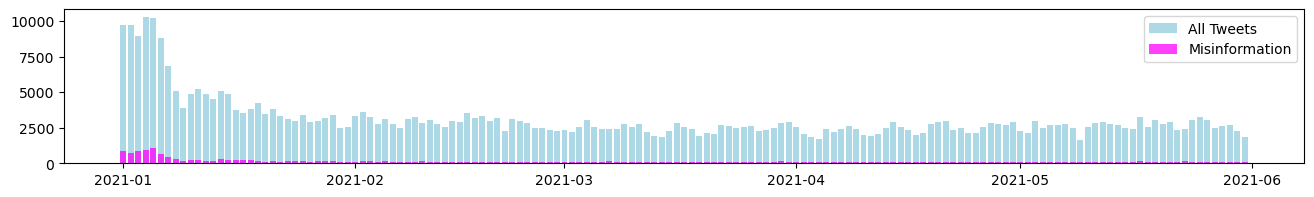

In [28]:
# Make a wide figure for the timeseries
plt.figure(figsize=(16, 2))

# Plot date on the x axis, and n (total number of tweets) on the y axis
plt.bar(av_totals_2021.date, av_totals_2021.n, color='lightblue', label="All Tweets")

# Overlay a count of the misinformation tweets (the fake_merged variable) in a different color
plt.bar(
    av_totals_2021.date,
    av_totals_2021.fake_grinberg,
    color='magenta',
    alpha=0.75, # alpha controls the opacity (alpha = 1 is solid, alpha = 0 is completely transparent)
    label="Misinformation" # whatever string you put here will go into the legend
)
plt.legend()

The chart shows the total number of tweets and misinformation tweets from January to June 2021, with a clear decline in both over time. Similar to the first chart, there is a sharp drop in early January, followed by a gradual decrease. The proportion of misinformation is highest in early January but steadily decreases, mirroring the trend in total tweets. Both charts consistently indicate a sustained presence of misinformation. We could conclude that the classification of misinformation in the paper could have the same general trend.

---

# **Section 3** Replication of Main DiD Results
In this section, you will perform at least one Difference in Differences analysis with the goal of conceptually replicating the key DiD analysis that McCabe et al performed to support their primary conclusion.  

## **Section 3-1** Main DiD Results: Impacts on Deplatformed-User Followers and Non-followers

Let's first try to analyze deplatforming on two groups‘ sharing behaviors, including the followers of deplatfromed users(Group_B) and those not following them(Group_F). And the outcome variable chosen for comparision is the fake_merged_rt, which demostrates one of an  important aspect of communicating misinformation.

In [29]:
# Import the dataset again, and pay special attention to the stat type, here we choose followers and non-followers, and total stat values
df = mccabe_data.copy()
df['date'] = pd.to_datetime(df['date'])
df = df[df["stat"] == "total"]
# Here I create a new dataframe to incoporate the followers and non-followers
df_mdid = df[(df['group'] == 'B') | (df['group'] == 'F')].copy()
# The date that the deplatforming event occurred
suspension_start = pd.to_datetime('2021-01-06')
# We would like to perform the DID analysis, therefore we should set up the post-treatment date and treatment group
df_mdid['post_treatment'] = (df_mdid['date'] > suspension_start).astype(int)
df_mdid['treatment_group'] = (df['group'] == 'B').astype(int)
# Here is the very commonly used format for DID formula, and we choose the fake_merged_rt as outcome variables
formula = 'fake_merged_rt ~ post_treatment + treatment_group + post_treatment*treatment_group'
model = smf.ols(formula, data=df_mdid)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         fake_merged_rt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     1476.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:24:23   Log-Likelihood:                -9067.7
No. Observations:                1100   AIC:                         1.814e+04
Df Residuals:                    1096   BIC:                         1.816e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [30]:
# Interpretation of the above summary table has been attached (see below)

The model explains a significant amount of variance (R-squared = 0.802, indicating that 80.2% of the variance could be explained). All predictors, including the interaction term, are statistically significant(p < 0.05). The intercept suggests that without any treatment or intervention (baseline condition), the average level of misinformation retweeted is about 490. And in the post-treatment period (after suspension), the average level of misinformation retweeted decreases by about 208 units compared to the pre-treatment period. In the pre-treatment period, the deplatformed user followers has a much higher average number of misinformation retweeted (by about 3959 units) compared to the not-followers. Lastly, in the post-treatment period, the average number of misinformation retweeted for the treatment group decreases by about 2049 units, beyond what is captured by the main effects of post-treatment and treatment group alone. This implies that deplatforming leads to a significant reduction in misinformation retweets for followers compared to non-followers.

## **Section 3-2** Given Time Window and Exact Duplication for Visulization

What I am going to do in this subsection is to duplicate the Fig. 4 | Time series of misinformation retweeting for followers and not-followers. 

In [31]:
# Here I have attached a screenshot of the DID performed by the authors

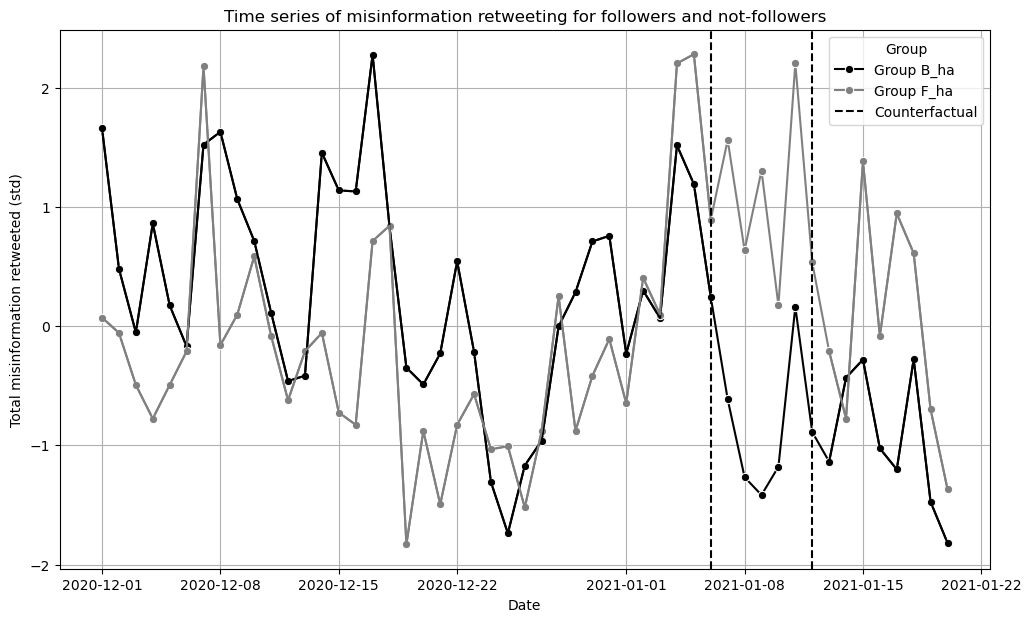

In [32]:
# Before doing the exact visulization, I would like to align the time window and statistical preprocessing(standardization)
# Copy the dataset and filter for 'total' stat
df = mccabe_data.copy()
df = df[df["stat"] == "total"]
df['date'] = pd.to_datetime(df['date'])

# Filter data for groups 'B_ha' and 'F_ha' within the date range
df = df[(df['group'].isin(['B_ha', 'F_ha'])) & 
        (df['date'] >= '2020-12-01') & 
        (df['date'] <= '2021-01-20')]

# Standardize 'fake_merged_rt' column separately for each group
df['fake_merged_rt_std'] = df.groupby('group')['fake_merged_rt'].transform(
    lambda x: (x - x.mean()) / x.std()
)

# Create pre- and post-treatment indicators
df['pre_treatment'] = df['date'] <= '2021-01-06'
df['post_treatment'] = df['date'] > '2021-01-12'

# Fit OLS regressions for group B_ha
ols_before_B_ha = ols('fake_merged_rt_std ~ date', data=df[(df['group'] == 'B_ha') & (df['pre_treatment'])]).fit()
ols_after_B_ha = ols('fake_merged_rt_std ~ date', data=df[(df['group'] == 'B_ha') & (df['post_treatment'])]).fit()

# Fit OLS regressions for group F_ha
ols_before_F_ha = ols('fake_merged_rt_std ~ date', data=df[(df['group'] == 'F_ha') & (df['pre_treatment'])]).fit()
ols_after_F_ha = ols('fake_merged_rt_std ~ date', data=df[(df['group'] == 'F_ha') & (df['post_treatment'])]).fit()

# Prepare pre-treatment and post-treatment dates for B_ha and F_ha
dates_pre_B_ha = df[(df['group'] == 'B_ha') & df['pre_treatment']]['date']
dates_post_B_ha = df[(df['group'] == 'B_ha') & df['post_treatment']]['date']

dates_pre_F_ha = df[(df['group'] == 'F_ha') & df['pre_treatment']]['date']
dates_post_F_ha = df[(df['group'] == 'F_ha') & df['post_treatment']]['date']

# Align fitted values with corresponding dates for B_ha and F_ha
fitted_pre_B_ha = pd.Series(ols_before_B_ha.fittedvalues, index=dates_pre_B_ha.index)
fitted_post_B_ha = pd.Series(ols_after_B_ha.fittedvalues, index=dates_post_B_ha.index)

fitted_pre_F_ha = pd.Series(ols_before_F_ha.fittedvalues, index=dates_pre_F_ha.index)
fitted_post_F_ha = pd.Series(ols_after_F_ha.fittedvalues, index=dates_post_F_ha.index)

# Plot setup
plt.figure(figsize=(12, 7))

# Plot actual data points for groups B_ha and F_ha
sns.lineplot(data=df[df['group'] == 'B_ha'], x='date', y='fake_merged_rt_std', 
             color='black', label='Group B_ha', marker='o', linestyle='-')
sns.lineplot(data=df[df['group'] == 'F_ha'], x='date', y='fake_merged_rt_std', 
             color='gray', label='Group F_ha', marker='o', linestyle='-')

# Plot fitted lines for groups B_ha and F_ha
plt.plot(dates_pre_B_ha, fitted_pre_B_ha, color='black', linestyle='-')
plt.plot(dates_post_B_ha, fitted_post_B_ha, color='black', linestyle='-')

plt.plot(dates_pre_F_ha, fitted_pre_F_ha, color='gray', linestyle='-')
plt.plot(dates_post_F_ha, fitted_post_F_ha, color='gray', linestyle='-')

# Add the counterfactual dashed lines
plt.axvline(x=pd.to_datetime('2021-01-06'), color='black', linestyle='--', label='Counterfactual')
plt.axvline(x=pd.to_datetime('2021-01-12'), color='black', linestyle='--')

# Add labels, title, and legend
plt.title('Time series of misinformation retweeting for followers and not-followers')
plt.xlabel('Date')
plt.ylabel('Total misinformation retweeted (std)')
plt.legend(title='Group', loc='upper right')
plt.grid(True)

# Display the plot
plt.show()

Here I followed the instruction of the footnotes in the paper, and as indicated, sample size includes 51 observations (days) from 1 December 2020 to 20 January 2021. The counterfactual identified under the parallel path assumption is shown as a dashed line after 12 January 2021. In the paper, fitted straight lines are ordinary least squares regressions of standardized daily total retweeted misinformation, fitted separately before 6 January 2021 and after 12 January 2021 and by group. My results for visualization looks exactly the same as the one in the paper, which implies that I have successfully duplicate the results after more complicated standardization. And the visulization after std also implies a rougly parallel trend, which was an essential part for DiD analysis. During the suspension period, there was a clear divergence.

---

# **Section 4** Extensions and follow up analyses
In this section, you will perform follow-up analyses, summaries, or visualizations that you feel help shed light on the robustness of the conclusion reached by McCabe et al. You are welcome to draw on insights you gained through data simulation, and to draw on the questions we discussed in class surrounding the **key assumptions and study decisions** in [Notebook 1: Data Acquisition](https://github.com/ccs-ucb/CSS1A/blob/main/notebooks/notebook-1-data-acquisition.ipynb).

## **Section 4-1** Impacts of Changes of Key Variables on Results

In [33]:
# Given that in the following analysis, DID could be repeatedly applied, I integrated it into a function
def run_did_analysis(df, stat, treatment_group, control_group, outcome_var):
    # Start over and import the dataset
    df = mccabe_data.copy()
    df['date'] = pd.to_datetime(df['date'])
    df = df[df['stat'] == stat]
    
    # Create a new dataframe for the treatment and control group
    df_mdid = df[(df['group'] == treatment_group) | (df['group'] == control_group)].copy()

    # Define the date of the deplatforming event
    suspension_start = pd.to_datetime('2021-01-06')

    # Set up post-treatment and treatment group indicators
    df_mdid['post_treatment'] = (df_mdid['date'] > suspension_start).astype(int)
    df_mdid['treatment_group'] = (df_mdid['group'] == treatment_group).astype(int)

    # Define the DID formula
    formula = f'{outcome_var} ~ post_treatment + treatment_group + post_treatment*treatment_group'

    # Run the DID model
    model = smf.ols(formula, data=df_mdid)
    results = model.fit()

    return results.summary()

In [34]:
# I was wondering if the outcome variables and the stat used for the datasets would affect the general outcomes, let's try them below

### Another DiD

In the previous section, we examined the main DID in the paper to see the "indirect" effects of the delpatforming on deplaformed user-followers. Here we would like to see the impact of effects from another aspect. Let's see how it affects the misinformation sharers and non-misinformation sharers.

In [35]:
run_did_analysis(df=df, stat='total',treatment_group='fns', control_group='nfns',outcome_var='fake_merged_initiation')

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     fake_merged_initiation   R-squared:                       0.865
Model:                                OLS   Adj. R-squared:                  0.864
Method:                     Least Squares   F-statistic:                     2333.
Date:                    Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                            21:24:26   Log-Likelihood:                -7736.7
No. Observations:                    1100   AIC:                         1.548e+04
Df Residuals:                        1096   BIC:                         1.550e+04
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        115.2568     13.658      8.439      0.000      88.459     142.055
post_treatment                   -48.3258     26.599     -1.817      0.070    -100.517       3.866
treatment_group                 1480.1975     19.315     76.636      0.000    1442.299    1518.096
post_treatment:treatment_group  -548.3699     37.617    -14.578      0.000    -622.180    -474.560
==============================================================================
Omnibus:                      158.913   Durbin-Watson:                   0.501
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1099.916
Skew:                           0.449   Prob(JB):                    1.43e-239
Kurtosis:                       7.816   Cond. No.                         6.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Conclusion attached below

Again, the model explains a significant amount of variance (R-squared = 0.865, indicating that 86.5% of the variance could be explained). All predictors, including the interaction terms, are statistically significant(p < 0.05). The intercept suggests that without any treatment or intervention (baseline condition), the average level of misinformation initiated is about 115. In the pre-treatment period, the misinformation sharers has a much higher average number of misinformation initiated (by about 1480 units) compared to the non-misinformation sharers. Lastly, in the post-treatment period, the average number of misinformation initiated for the treatment group decreases by about 548 units, beyond what is captured by the main effects of post-treatment and treatment group alone. This implies that deplatforming also leads to a significant reduction in misinformation sharing.

### Changing Outcome Variables and(or) Stat

For the ease of comparision, in the following content, unless specified otherwise, I would use the one in Section 3-1 as a benchmark model. And in the newly defined functions, the parameters is # df=df, stat='total',treatment_group='B',control_group='F', outcome_var='fake_merged_rt'.

In [37]:
# Here I changed the stat to avg, taking into account the user size of different groups after deplatforming
run_did_analysis(df=df,stat='avg',treatment_group='B',control_group='F',outcome_var='fake_merged_rt')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         fake_merged_rt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     1713.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:24:27   Log-Likelihood:                 1190.3
No. Observations:                1100   AIC:                            -2373.
Df Residuals:                    1096   BIC:                            -2353.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.0833      0.004     20.411      0.000       0.075       0.091
post_treatment                    -0.0287      0.008     -3.609      0.000      -0.044      -0.013
treatment_group                    0.3763      0.006     65.177      0.000       0.365       0.388
post_treatment:treatment_group    -0.1504      0.011    -13.377      0.000      -0.172      -0.128
==============================================================================
Omnibus:                      589.761   Durbin-Watson:                   0.305
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7582.192
Skew:                           2.175   Prob(JB):                         0.00
Kurtosis:                      15.104   Cond. No.                         6.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Conclusion attached below

Interesting. The general findings still apply even if I've changed the stat from "total" to "avg". The model explains a significant amount of variance (R-squared = 0.824, indicating that 82.4% of the variance could be explained). All predictors, including the interaction term, are statistically significant(p < 0.05). The intercept suggests that without any treatment or intervention (baseline condition), the average level of misinformation retweeted(per user) is about 0.0833. And in the post-treatment period (after suspension), the average level of misinformation retweeted (per user) in the control group decreases by about 0.0287 units compared to the pre-treatment period. In the pre-treatment period, the deplatformed user followers has a much higher average number of misinformation retweeted per user (by about 0.3763 units) compared to the not-followers. Lastly, in the post-treatment period, the average number of misinformation retweeted (per user) for the treatment group decreases by about 0.1504 units, beyond what is captured by the main effects of post-treatment and treatment group alone. This implies that deplatforming leads to a significant reduction in misinformation retweets for followers compared to non-followers, even we take into account the fluctuating user size.

In [39]:
# How about the impacts of misinformation initiation sharing 
run_did_analysis(df=df,stat='total',treatment_group='B',control_group='F',outcome_var='fake_merged_initiation')

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     fake_merged_initiation   R-squared:                       0.814
Model:                                OLS   Adj. R-squared:                  0.814
Method:                     Least Squares   F-statistic:                     1602.
Date:                    Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                            21:24:27   Log-Likelihood:                -7450.4
No. Observations:                    1100   AIC:                         1.491e+04
Df Residuals:                        1096   BIC:                         1.493e+04
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        255.2840     10.528     24.249      0.000     234.627     275.941
post_treatment                  -104.6702     20.504     -5.105      0.000    -144.901     -64.440
treatment_group                  918.0346     14.888     61.661      0.000     888.822     947.247
post_treatment:treatment_group  -221.5725     28.996     -7.641      0.000    -278.467    -164.678
==============================================================================
Omnibus:                      147.558   Durbin-Watson:                   0.560
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              849.482
Skew:                           0.460   Prob(JB):                    3.45e-185
Kurtosis:                       7.206   Cond. No.                         6.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# Conclusion attached below

Once again, the general findings still apply when I changed the outcome variable from retweets to initiate tweets. The model explains a significant amount of variance (R-squared = 0.814, indicating that 81.4% of the variance could be explained). All predictors, including the interaction term, are statistically significant(p < 0.05). The intercept suggests that without any treatment or intervention (baseline condition), the average level of creating misinformation tweets is about 255.28. And in the post-treatment period (after suspension), the average level of creating misinformation tweets in the control group decreases by about 221.6 units compared to the pre-treatment period. Lastly, in the post-treatment period, the average number of misinformation tweets created by the treatment group decreases by about 221 units. This implies that deplatforming leads to a significant reduction in misinformation tweets for followers compared to non-followers.

In [41]:
# How about changing the stat from the above modified version?
run_did_analysis(df=df,stat='avg',treatment_group='B',control_group='F',outcome_var='fake_merged_initiation')

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     fake_merged_initiation   R-squared:                       0.810
Model:                                OLS   Adj. R-squared:                  0.810
Method:                     Least Squares   F-statistic:                     1558.
Date:                    Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                            21:24:28   Log-Likelihood:                 2788.1
No. Observations:                    1100   AIC:                            -5568.
Df Residuals:                        1096   BIC:                            -5548.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.0438      0.001     45.839      0.000       0.042       0.046
post_treatment                    -0.0147      0.002     -7.886      0.000      -0.018      -0.011
treatment_group                    0.0774      0.001     57.325      0.000       0.075       0.080
post_treatment:treatment_group     0.0038      0.003      1.449      0.148      -0.001       0.009
==============================================================================
Omnibus:                      556.340   Durbin-Watson:                   0.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8434.906
Skew:                           1.952   Prob(JB):                         0.00
Kurtosis:                      15.992   Cond. No.                         6.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Conclusion attached below

Although the model still has a relatively high R2 score, the most important feature that we might be interested in has become not statistically significant. While the benchmark model did show the relationship, the impact of deplatforming for other users(regardless of their relationships with the deplatformed users) seems less connnected now. Therefore, we might not get the results as anticipated. But this implies that the effectiveness of the model could sometimes suffer from changes in variables. Although so far the other tests still show robust results.

In [43]:
# Changing the definition of misinformation by using different lists (summary in the end)
# How about changing the list for misinformation classification-Grinberg et al. (2019) list
run_did_analysis(df=df, stat='total',treatment_group='B',control_group='F',outcome_var='fake_grinberg_rt')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       fake_grinberg_rt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1416.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:24:29   Log-Likelihood:                -7910.8
No. Observations:                1100   AIC:                         1.583e+04
Df Residuals:                    1096   BIC:                         1.585e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        146.5457     16.000      9.159      0.000     115.152     177.939
post_treatment                   -65.9043     31.161     -2.115      0.035    -127.046      -4.762
treatment_group                 1351.9654     22.627     59.750      0.000    1307.568    1396.363
post_treatment:treatment_group  -867.4689     44.068    -19.685      0.000    -953.936    -781.001
==============================================================================
Omnibus:                      335.154   Durbin-Watson:                   0.455
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2177.721
Skew:                           1.239   Prob(JB):                         0.00
Kurtosis:                       9.432   Cond. No.                         6.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# How about changing the list for misinformation classification-Newsguard list
run_did_analysis(df=df,stat='total',treatment_group='B',control_group='F',outcome_var='fake_grinberg_rb_rt')

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     fake_grinberg_rb_rt   R-squared:                       0.716
Model:                             OLS   Adj. R-squared:                  0.715
Method:                  Least Squares   F-statistic:                     919.0
Date:                 Sat, 19 Oct 2024   Prob (F-statistic):          1.42e-298
Time:                         21:24:29   Log-Likelihood:                -7636.1
No. Observations:                 1100   AIC:                         1.528e+04
Df Residuals:                     1096   BIC:                         1.530e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         70.6099     12.464      5.665      0.000      46.153      95.067
post_treatment                   -44.3478     24.276     -1.827      0.068     -91.980       3.284
treatment_group                  840.7556     17.627     47.696      0.000     806.168     875.343
post_treatment:treatment_group  -619.5556     34.331    -18.047      0.000    -686.917    -552.194
==============================================================================
Omnibus:                      556.026   Durbin-Watson:                   0.375
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5543.562
Skew:                           2.102   Prob(JB):                         0.00
Kurtosis:                      13.162   Cond. No.                         6.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# How about changing the list for misinformation classification-Newsguard list
run_did_analysis(df=df,stat='total',treatment_group='B',control_group='F',outcome_var='fake_newsguard_rt')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      fake_newsguard_rt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     1365.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:24:29   Log-Likelihood:                -9043.7
No. Observations:                1100   AIC:                         1.810e+04
Df Residuals:                    1096   BIC:                         1.812e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        455.5333     44.814     10.165      0.000     367.603     543.464
post_treatment                  -202.7471     87.279     -2.323      0.020    -373.999     -31.495
treatment_group                 3722.5951     63.376     58.738      0.000    3598.243    3846.947
post_treatment:treatment_group -1938.4640    123.430    -15.705      0.000   -2180.651   -1696.277
==============================================================================
Omnibus:                      474.398   Durbin-Watson:                   0.286
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4450.884
Skew:                           1.734   Prob(JB):                         0.00
Kurtosis:                      12.224   Cond. No.                         6.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Conclusion goes below

Despite changes for identifying misinformation, the benchmark model would still generate a good result, such as a high R2 and all the four statistically significant variables. Besides, the signs of the coefficient always remain the same, including a positive intercept, negative post_treatment, positive treatment and a negative interaction term, which enables our consistent interpretation. However, despite the same general results, the magtitude of the impacts differ as changes imposed on classifying misinformation using different list.

## **Section 4-2** Impacts of Changes of Time Window

In [47]:
# Let me re-define a function to incoporate the effects of time; this is simply a modification of the previous function

def run_did_analysis_with_time_windows(df, stat, treatment_group, control_group, outcome_var, 
                                       pre_treatment_window=None, post_treatment_window=None):
    """
    - pre_treatment_window: Number of days before the intervention (optional)
    - post_treatment_window: Number of days after the intervention (optional)
    """
    # Start over and import the dataset
    df = mccabe_data.copy()
    df['date'] = pd.to_datetime(df['date'])
    df = df[df['stat'] == stat]

    # Create a new dataframe for the treatment and control groups
    df_mdid = df[(df['group'] == treatment_group) | (df['group'] == control_group)].copy()

    # Define the date of the deplatforming event
    suspension_start = pd.to_datetime('2021-01-06')

    # Apply time window filtering if specified
    if pre_treatment_window:
        pre_treatment_start = suspension_start - pd.Timedelta(days=pre_treatment_window)
        df_mdid = df_mdid[df_mdid['date'] >= pre_treatment_start]

    if post_treatment_window:
        post_treatment_end = suspension_start + pd.Timedelta(days=post_treatment_window)
        df_mdid = df_mdid[df_mdid['date'] <= post_treatment_end]

    # Set up post-treatment and treatment group indicators
    df_mdid['post_treatment'] = (df_mdid['date'] > suspension_start).astype(int)
    df_mdid['treatment_group'] = (df_mdid['group'] == treatment_group).astype(int)

    # Define the DID formula
    formula = f'{outcome_var} ~ post_treatment + treatment_group + post_treatment*treatment_group'

    # Run the DID model
    model = smf.ols(formula, data=df_mdid)
    results = model.fit()

    return results

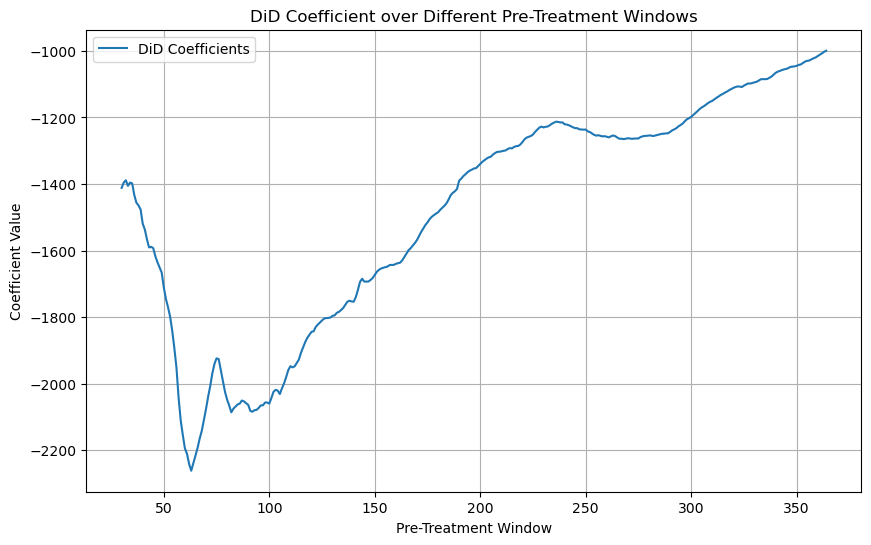

In [48]:
# I'm also very interested in the impact of time windows on the ultimate outcomes

coefficients = []

# Loop through post_treatment_window values from 30 to 365
for window in range(30, 365):
    # Run the DID analysis for each window value
    model = run_did_analysis_with_time_windows(
        df=df,
        stat='total',
        treatment_group='B',
        control_group='F',
        outcome_var='fake_merged_rt',
        pre_treatment_window=window,
        post_treatment_window=30,
    )
    
    # Extract the coefficient for 'post_treatment:treatment_group'
    coeff = model.params['post_treatment:treatment_group']
    # Store the coefficient in the list
    coefficients.append(coeff)

# Visualize the coefficients
plt.figure(figsize=(10, 6))
plt.plot(range(30, 365), coefficients, label='DiD Coefficients')
plt.xlabel('Pre-Treatment Window')
plt.ylabel('Coefficient Value')
plt.title('DiD Coefficient over Different Pre-Treatment Windows')
plt.grid(True)
plt.legend()
plt.show()

In [49]:
# Conclusion goes below

While in the previous cells, we've tried different pre-treatment window by running values through 30 to 365, the visulization did demostrates that the windows of the pre-trement really matters in the magtitude of treament effect, which was interpreted as the deplatforming event. The plot starts with a coefficient value of around -1400 and initially drops sharply, reaching a minimum of around -2200. After this sharp decline, the coefficients increase steadily, eventually reaching around -1000 by the end of the window. The line shows fluctuations, particularly in the earlier stages, with the coefficients experiencing some variability before stabilizing in the upward trend. This reflects the dynamic changes in the estimated treatment effect as the pre-treatment window extends.

---

# **Section 5** Conclusions and Reflections
Here is where you draw together insights you have gained by analyzing this dataset and reflections on the methods we have applied. You should provide a clear answer to the question: 

> What are your conclusions about the question posed in this assignment: **Did deplatforming reduce misinformation on Twitter?**

You are welcome to use the bullet points below to guide your reflections if they are helpful, and also to include any additional insights. 

*  Is the current dataset sufficient to offer insight into this question? What are some key limitations of the dataset, and key merits?
*  Is the DiD method sufficient to support strong conclusions related to this question?
*  Overall, do you think the conclusions of McCabe et al. (2024) are justified?
*  More generally, do you feel that misinformation on social media is a substantial threat to discourse and society that data science can address, and how has this project influenced your view?  

**Based on previous analyses, I think deplatfroming did reduce misinfromation on Twitter.**

**1. I think the current dataset is sufficient to offer insight into the question posted; but there are still areas for improvement.**

The current dataset contains detailed information on misinformation sharing, retweets, and user categorization. The dataset includes a lot of variations that we could explore, including classification using different lists, different activity levels across subgroups (i.e., high-, medium-, and low-active), and the number of deplatformed users followed, among others. This offers a rich dataset to investigate misinformation spread on Twitter using different variations. Additionally, the dataset covers periods before and after key political events, like the January 6th insurrection, allowing for comparative analysis using quasi-experimental designs such as DiD.

However, there are some limitations that need improvement. The authors were not very careful in preprocessing the dataset, as there is one duplicated value in the date: 2020-06-30. It is strange that on this date, the values for different subgroups even vary, making it difficult to know which one is correct. This might introduce noise to the dataset, despite the high quality it could have maintained. Moreover, there are some inconsistencies in the data composition. There are supposed to be 60 values for each day; nevertheless, there were several dates that only have 58 values. After careful observation and logical reasoning, it appears that the missing values are always those not eligible to become certain group. The dataset creators could remind readers or potential users of this issue beforehand.

Besides, the dataset might suffer from confounding variables due to simultaneous events (like the insurrection) that can impact behavior, making it difficult to isolate the effects of deplatforming alone (McCabe et al., 2024). And while the panel is filtered using voter data, there is potential bias due to the exclusion of non-human actors (bots), which could play a significant role in misinformation dissemination. Moreover, the dataset primarily focuses on retweet and tweet counts without fully capturing the nuances of engagement (e.g., likes, replies) that could be influential. Last but not the least, while deplatformed users have been removed, there is still a chance that they could create new accounts or shift to other social media platforms, which could affect the spectrum of misinformation, though such a pattern is difficult to capture.

**2. The DiD method is sufficient to support strong conclusions related to this question, given the strong assumptions made hold true.**

Previous analyses indicate that Twitter's deplatforming effectively reduces misinformation, particularly among followers of deplatformed users. After several attempts to check the robustness of the results, the model works effectively most of the time, adding confidence to the conclusions. The DiD approach captures the differences between the control and treatment groups in their baseline values; for instance, followers of deplatformed users are more enthusiastic about misinformation sharing. It is also interesting to observe from the results that deplatforming plays a role, as the pre-treatment and post-treatment periods show a statistically significant decrease. The deplatforming action regulates both the sources and the exposure to misinformation. Deplatforming immediately reduces the ability of deplatformed users to share content. With the decreased amount of misinformation available, retweet behavior for those posts also decreases. Additionally, users may become more cautious about sharing misinformation due to the fear of facing similar suspensions.

However, there are some limitations to the DiD approach. DiD methods assume that, in the absence of treatment, the average outcomes for the treated and control groups would have followed parallel trends over time. However, this assumption is often difficult to verify, and when it is violated, the causal estimates from DiD may be biased. In my attempt to replicate the exact visualization from the authors’ paper, the standardization makes sense to demonstrate similar trends compared to unadjusted values. However, the visualization itself lacks more accurate explanation of the parallel trend. In the case of heterogeneous treatment effects, the DiD approach typically estimates an average treatment effect, potentially hiding crucial subgroup variations.

**3. Overall, I think the conclusions of McCabe et al. (2024) are largely justified.**

In the paper, McCabe et al. (2024) use more than one approach. Apart from DiD, they also use regression discontinuity (SRD). The SRD analysis indicates a significant decline in misinformation sharing by deplatformed users, as expected. Meanwhile, the DiD analysis shows a notable spillover effect, with a reduction in retweets by users who followed deplatformed accounts. This suggests that deplatforming impacts misinformation both directly and indirectly. The authors made efforts to verify some of the assumptions, although not all of them may hold true. They used a placebo test by investigating the patterns of shopping and sports tweets; if the expectations are correct, the behavior of those users should not change due to the intervention. This would indicate that the intervention did not affect behavior it was not intended to, increasing confidence in the intervention's effect on misinformation sharing.

However, the study faces limitations that temper its causal claims. The SRD design is confounded by concurrent political events, such as the insurrection itself and media coverage of election certification, which complicates efforts to isolate the deplatforming's specific impact. The authors acknowledge that interpreting these results as causal depends on strong assumptions, such as continuity and parallel trends, which may not fully hold given the extraordinary context. Furthermore, although Twitter’s intervention appears effective in reducing misinformation, the findings may not generalize to other deplatforming events due to amplification by media coverage and user awareness. Overall, while McCabe et al.(2024) provide compelling evidence of Twitter’s regulatory capacity, the results might be better viewed as context-specific and contingent upon unverified assumptions.

**4. From my perspective, I do feel that misinformation on social media is a substantial threat to discourse and society; however, I am pessimistic about the viewpoint that data science can address this threat fully.**

It is always tricky to define misinformation. Is it something that contradicts the truth that we can verify? Or is it simply something taken out of context, making its authenticity difficult to validate? Even the authors did not do very well in this regard, as the study classified tweets as misinformation if they contained URLs from a predefined list of domains. These lists focused on domains that lack editorial norms or have low credibility scores. URLs in tweets were cross-referenced with this list, but the analysis did not evaluate the content’s truthfulness. As such, it might oversimplify the classification of misinformation. On the one hand, the domains might not necessarily represent misinformation but are classified as such (False Positive); on the other hand, the scope of misinformation could be much larger than fake news, with some content not identified as misinformation (False Negative).

Secondly, there are potential harms of misinformation in shaping false beliefs (Ecker, U. K. et al., 2012). People often rely on intuition rather than careful reasoning when determining what is true, making them prone to biases. Repetition of a claim makes it seem more believable, a phenomenon known as the illusory truth effect. This effect can persist over time, regardless of cognitive ability and prior knowledge. Misinformation can continue to influence people’s thinking even after they receive a correction and accept it as true, known as the continued influence effect.

In conclusion, people should practice their critical thinking skills and make sound judgments. We are currently living in the era of Artificial Intelligence, and the issue of DeepFake makes it even more challenging to differentiate truth from misinformation. People should be cautious about the information consumed and exercise the same caution when creating and spreading information. Meanwhile, social media platforms should also play a role in combating misinformation. It shouldn’t necessarily involve coercion or suppression. However, even a kind reminder or downranking (with public voting) could work effectively. The main reason I am not confident that the issue of misinformation can be addressed solely by data science is the awareness of its complexities and human creativity. We should never underestimate human creativity in communication and the ability to create and understand coded language. Social media users often employ countermeasures to circumvent detection by social media algorithms. There could be an infinite number of variations, metaphors with historical roots, and other complexities. Moreover, there are complex ethical considerations about the right to freedom of speech, which adds on another layer of complication. They makes it almost impossible for data science to fully address these issues.

**5. Other thoughts**

Social media holds significant power in regulating discourse through its terms of use. McCabe et al. (2024) also noted two instruments, including content moderation and the enforcement of users' terms of use. In the paper, the main discussion centered around the enforcement instrument, such as deplatforming; nevertheless, an important part of the communication landscape remains unaddressed. Prior to this project, I anticipated that the direct effects of deplatforming on social media would be straightforward: targeted users are removed, and their "products" inevitably diminish. But it is also interesting to discover spillover effects in this sphere. And while deplatforming may have some indirect effects at first glance, what happens if users change their ways of expression? This could result in misinformation that continues to exist and becomes harder to detect, posing a new challenge. Consequently, our conclusions may be threatened. Lastly, it is always true that data scientists alone cannot adequately address these issues. Tackling them requires broader and deeper collaboration among stakeholders, including the public and policymakers.